# Exploratory Data Analysis StackOverflow Dev Survey <br/>  --> (Keystone 0: Data Presentation) 

Initial data presentation for Thinkful DS program. SOF survey analysis of DS attitudes

This notebook contains basic statistical analysis and visualization of the data.

## Data Sources
- summary : Processed file from notebook 1-Data_Prep
- limited scope of inquiry to professional developers and simplified categories of experience and education.

## Changes
- 08-06-2019 : Started project



In [17]:
import pandas as pd
from pathlib import Path
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt

In [18]:
%matplotlib inline

In [19]:
# the questionaire file
schema_file = Path.cwd() / "data" / "raw" / "schema2019.csv"
schema = pd.read_csv(schema_file,index_col = 'Column')
schema.QuestionText['FizzBuzz']

'Have you ever been asked to solve FizzBuzz in an interview?'

### File Locations

In [20]:
today = datetime.today()
in_file = Path.cwd() / "data" / "processed" / f"summary_{today:%b-%d-%Y}.pkl" #summary_Sep-02-2019.pkl
report_dir = Path.cwd() / "reports"
#report_file = report_dir / "Excel_Analysis_{today:%b-%d-%Y}.xlsx"

In [21]:
df = pd.read_pickle(in_file)

In [22]:
in_file
df['FizzBuzz']

Respondent
4         No
5         No
7         No
9        Yes
10        No
13       Yes
14        No
16       Yes
17        No
19        No
22        No
23        No
24        No
25        No
26        No
28        No
29       Yes
30        No
32        No
33        No
35        No
36        No
38        No
39        No
41        No
42        No
43        No
44        No
46        No
47       Yes
        ... 
88844    Yes
88845     No
88846     No
88847     No
88848     No
88850    Yes
88852     No
88853    Yes
88854     No
88855     No
88856     No
88857     No
88858     No
88860     No
88865     No
88866     No
88867     No
88868    Yes
88869     No
88871     No
88872     No
88873     No
88874     No
88876     No
88877    Yes
88878     No
88879     No
88881     No
88882     No
88883     No
Name: FizzBuzz, Length: 65679, dtype: category
Categories (2, object): [No, Yes]

# OVERVIEW

[commentary]As the business world adapts to the massive disrutption of internet and clout based services and the consumer expectations unleashed by the first movers and innovators, DATA SCIENTISTS have become hightly sought after.  This has made it a very attractive career building on the customs and tools pioneered by Academic Science expats and computer programmers.  

Data Science is a hot field, however, is "the best job in America" really much different from other developer roles?  Are the people doing it different?  That is, are their attitudes and aproaches of Data Scientists different from other coders and tech geeks?
Lets explore these questions by analysing data collected by Stack Overflow as part of their annual developer survey.

> data pre-processing in: 1-Data_Prep_SOF_DevSurvey.ipynb


## The Data

In order to answer these questions, we make use of data collected by Stack Overflow in response to their 2019 Annual Developer Survey. This data can be downloaded from: <https://insights.stackoverflow.com/survey>. To get a feel for this data, we read in the data set and conduct some exploratory analysis:




## Data Prep
In the notebook > `1-Data_Prep_SOF_DevSurvey.ipynb` we prepared the published data summaries in the following way
1. cleaned 
2. initial derived measures
    - simplified
3. fixed some masures
4. limited scope to PROFESSIONAL DEVELOPERS

# Description of data
1. Describe your dataset. Describe and explore your dataset in the initial section of your Report. What does your data contain and what is its background? Where does it come from? Why is it interesting or significant? Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.    
    

In [23]:
df.columns

Index(['MainBranch', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'Major', 'Education', 'OrgSize', 'DevType', 'isDS',
       'isDev', 'notDS', 'DSorDV', 'nYearsCode', 'nYearsPro', 'nAgeCode',
       'WorkWeekH', 'ImpSyn', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'ConvertedComp', 'OpenSourcer', 'OpenSource', 'OpSys',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn',
       'SocialMedia', 'Extraversion', 'ScreenName', 'nAge', 'Gen', 'Gender',
       'Trans', 'Sexuality', 'Ethnicity', 'Dependents', 'JobFactors',
       'DevEnviron', 'Containers', 'WorkChallenge', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'EduOther', 'Hobbyist', 'FizzBuzz',
       'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal',
       'CompFreq', 'SurveyLengt

# Research Questions

2. Ask and answer analytic questions. Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

The motivation behind this analysis is to explore how data scientists compare with non-data scientist developers ("non-data scientists"). Consequently, we set out to answer the following questions:

1. How does the demographic profile of data scientists differ from that of non-data scientists?
> - male/female ratio
> - incident of out "other"/trans
> - dependents
> - US vs other
>

2. What programming languages do data scientists favour and how do they differ from those used by non-data scientists?
> - histograms

3. How much coding experience do data scientists have compared to non-data scientists?
> - years experience
> - age first code
4. Are data scientists more satisfied with their jobs/careers than non-data scientists?
> - salary
> -

5. Life shit
> - dependents
> -impsyn
> -fizzbuzz



In [60]:
#pd.describe_option()
#pd.__version__
df.groupby('Dependents').ConvertedComp.agg( ['count','mean','sem'] ).sort_values('mean')
# also do "Gen" and "Age" looks at comp... compare that variance to DS vs Dev

,count,mean,sem
Dependents,,,
Yes,19613,126965.510376,1960.194134
No,29577,128117.743179,1700.706703


In [44]:
df.groupby('DSorDV').ConvertedComp.agg(['count','mean','sem','median']).sort_values('mean')
# if we look at "seasoned" persons does the difference between dev and DS converge?  variance for DS is insane...  
# are there DS who are putting in crazy salaries?  
#lets check the higest 10 salaries for evidence of errors/falsehood

,count,mean,sem,median
DSorDV,,,,
Developer,48243,125009.761851,1279.178268,56490.0
Data Scientist,1183,167481.308538,10430.086933,65424.0


DSorDV
Data Scientist    AxesSubplot(0.125,0.125;0.775x0.755)
Developer         AxesSubplot(0.125,0.125;0.775x0.755)
Name: ConvertedComp, dtype: object

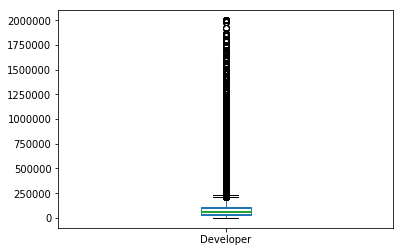

In [45]:
df.groupby('DSorDV').ConvertedComp.plot.box()

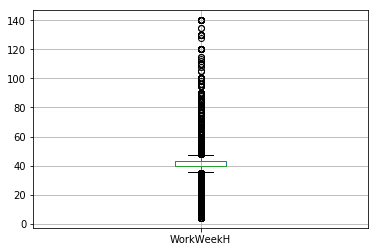

In [9]:
df.boxplot('WorkWeekH')
# Good these are numbers...
#survey.describe()

#survey['']

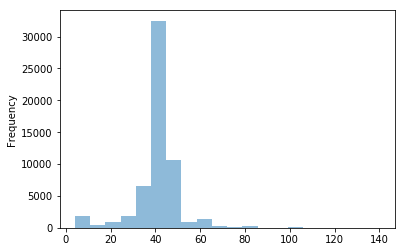

In [10]:
df['WorkWeekH'].plot.hist(bins=20, alpha=0.5)

In [59]:
## Create Dummy Variables for logistic regression, tree, etc

# save the DataFrame of dummy variables and concatenate them to the original DataFrame
Ed_dummies = pd.get_dummies(df.Education, prefix='Ed').iloc[:, 1:]
    #sur = pd.concat([survey, Edu_dummies], axis=1)
    #sur.head()
Ed_dummies.head(15)

,Ed_College,Ed_Advanced
Respondent,,
4,1,0
5,1,0
7,1,0
9,1,0
10,0,1
13,0,1
14,0,1
16,0,1
17,1,0


### Perform Data Analysis

###  enumerate each category so we can do proper logistic regression, etc later.

Topline
- DevType

Variables:
- Education (EdLevel -> )
- Career
- Sex
- Optimism (ImpSyn)
- BetterLife
- Age (Gen)
- major (UndergradMajor -> Major)
- CareerSat
- JobFactors
- MgrIdiot
- MgrWant
- MgrMoney
- WorkWeekHrs
- OpenSourcer
    - OpenSource 
- 'Containers',
- 'BlockchainOrg', 'BlockchainIs', 

SOCIAL/DEMOGRAPHIC
- 'ITperson', 'OffOn',
- 'SocialMedia', 
- 'Extraversion', 
- 'ScreenName',
- 'Age', 'Gender', 'Trans',
- 'Sexuality', 'Ethnicity', 'Dependents', 


NUMERIC VALUES
    - ConvertedComp
     -'YearsCode', 
     - 'Age1stCode',
     - 'YearsCodePro',
LISTS   
    - 'DevEnviron', 
    - 'OpSys', 
    - 'LanguageWorkedWith', 'LanguageDesireNextYear', 
    - 'DatabaseWorkedWith','DatabaseDesireNextYear', 
    - 'MiscTechWorkedWith','MiscTechDesireNextYear', (do these pairs  helps is understand how they see the future? (maybe drop))

IGNORE FOR NOW might want to look at these later.
- 'Hobbyist', 
- 'EduOther',  
- 'FizzBuzz', 
- 'ResumeUpdate',
- 'CurrencySymbol', 'CurrencyDesc', 
- 'CompTotal', 'CompFreq',
- 'SurveyLength', 'SurveyEase'


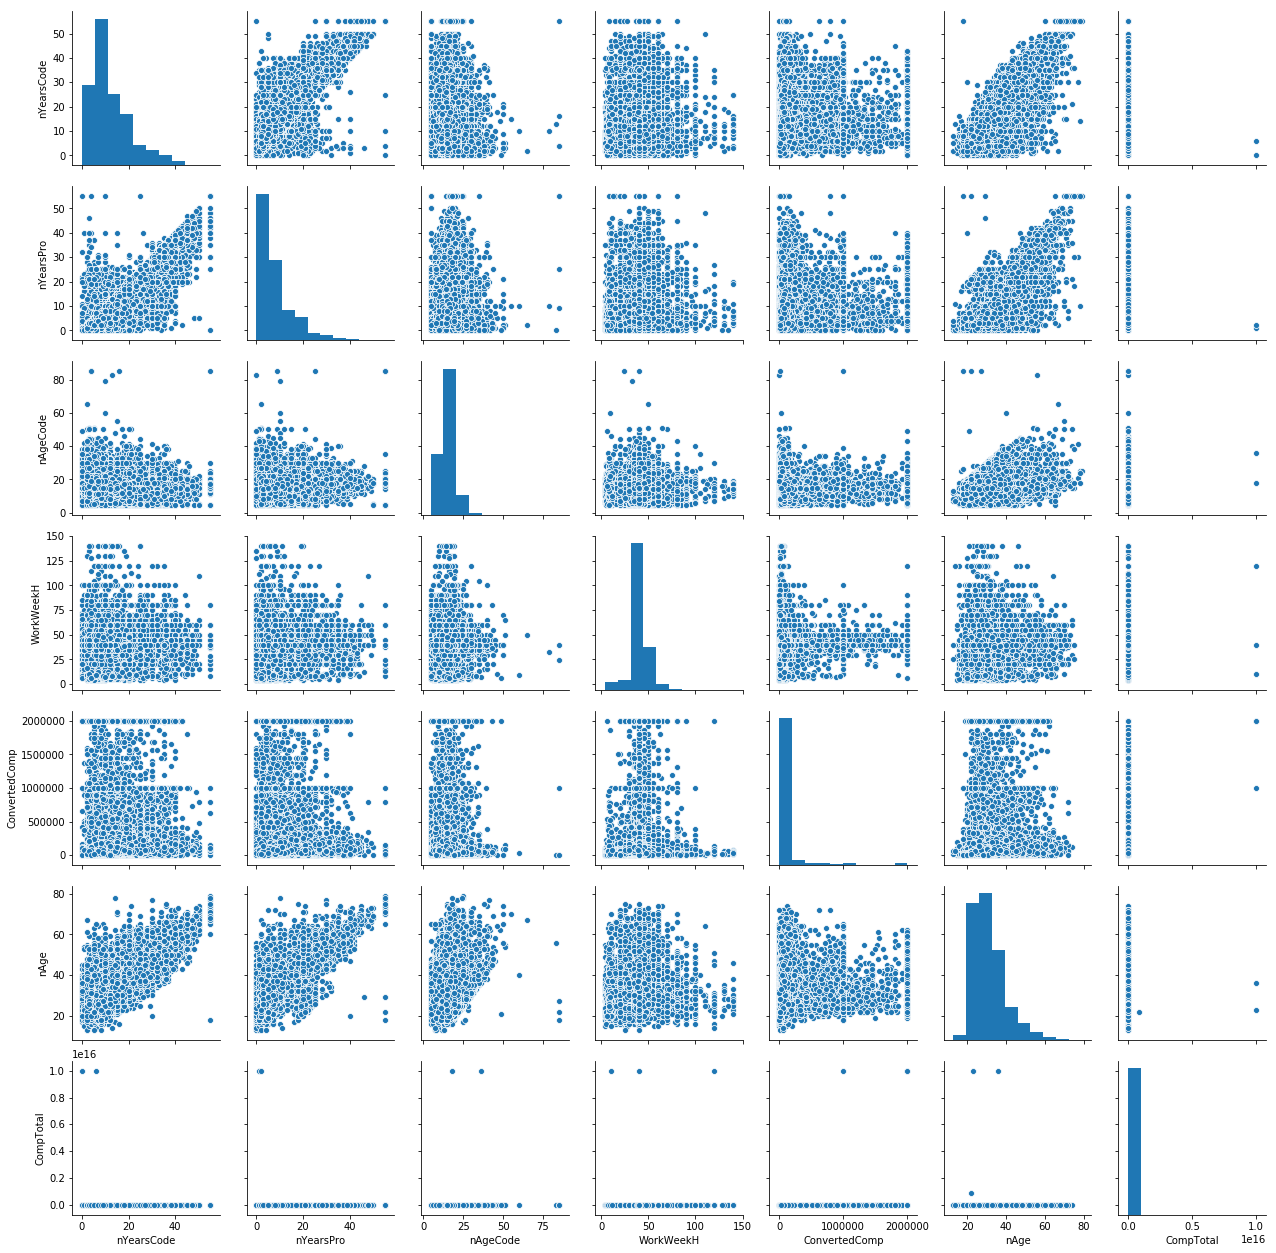

In [47]:
import seaborn as sns

sns.pairplot(df.loc[:,df.dtypes == 'float64'])

In [49]:
# check for nYearsCode >= nAge

corr = df.loc[:,df.dtypes == 'float64'].corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

# read the training dataset from Kaggle's Titanic competition into a DataFrame
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

# create a feature matrix 'X' by selecting two DataFrame columns
feature_cols = ['Pclass', 'Parch']
X = train.loc[:, feature_cols]
X.shape

# create a response vector 'y' by selecting a Series
y = train.Survived
y.shape

# fit a classification model to the training data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X, y)
logreg

# read the testing dataset from Kaggle's Titanic competition into a DataFrame
test = pd.read_csv('http://bit.ly/kaggletest')
test.head()

# create a feature matrix from the testing data that matches the training data
X_new = test.loc[:, feature_cols]
X_new.shape

# use the fitted model to make predictions for the testing set observations
new_pred_class = logreg.predict(X_new)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis
 

### Question 1

### Question 2

# So What?
 
 

3. Propose further research. Lastly, make a proposal for a realistic future research project on this dataset that would use some data science techniques you'd like to learn in the bootcamp. Just like your earlier questions, your research proposal should present one or more clear questions. Then you should describe the techniques you would apply in order to arrive at an answer.


### Recommendation... (Who's my "client"...what business decision are they making)

### Other recommendation.

## Further Questions - dig into attitudes
 

### Now vs. the Future.  An analysis of what data scientist vs developers are looking forward to with relation to what they are currently doing.

### Question

In [ ]:
# create a DataFrame of passenger IDs and testing set predictions
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class}).head()

In [ ]:
# ensure that PassengerID is the first column by setting it as the index
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class}).set_index('PassengerId').head()

In [ ]:
# write the DataFrame to a CSV file that can be submitted to Kaggle
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':new_pred_class}).set_index('PassengerId').to_csv('sub.csv')

In [ ]:
# save a DataFrame to disk ("pickle it")
train.to_pickle('train.pkl')

In [ ]:
# read a pickled object from disk ("unpickle it")
pd.read_pickle('train.pkl').head()

In [ ]:
# sample 75% of the DataFrame's rows without replacement
train = ufo.sample(frac=0.75, random_state=99)

# store the remaining 25% of the rows in another DataFrame
test = ufo.loc[~ufo.index.isin(train.index), :]

### Save Report file into reports directory?

Could save an Excel or make a report generator function...

In [ ]:
#writer = pd.ExcelWriter(report_file, engine='xlsxwriter')


In [ ]:
#df.to_excel(writer, sheet_name='Report')

In [ ]:
#writer.save()